In [2]:
from sklearn import svm, datasets
import sklearn.model_selection as model_selection
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
# import library sklearn, numpy, matplotlib, pandas

In [3]:
from google.colab import files
uploaded = files.upload()
# get data

Saving loan approval.csv to loan approval (1).csv


##Load Iris data set from Scikitlearn and store in Pandas Dataframe format

In [4]:
df = pd. read_csv("/content/loan approval.csv")
df['Status'] = df['Status'].map({'Y': 1, 'N': 0})
# read and set new status

df.head()
#show data

,Gender,Married,Dependents,Education,Self_Employed,Income(dollar),Coapplicant,Loan_Amount,Term(month),loan_History,Area,Status
0,Male,No,0,Not Graduate,No,144200.0,No,3500000,360.0,1.0,Urban,0
1,Female,No,3+,Not Graduate,No,183000.0,No,0,360.0,0.0,Urban,0
2,Male,Yes,1,Graduate,No,188000.0,No,6100000,360.0,NaN,Rural,0
3,Male,Yes,0,Graduate,No,195000.0,Yes,13500000,360.0,1.0,Rural,0
4,Female,No,0,Not Graduate,No,196300.0,No,5300000,360.0,1.0,Semiurban,1


In [5]:
df.columns # show column

Index(['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed',
       'Income(dollar)', 'Coapplicant', 'Loan_Amount', 'Term(month)',
       'loan_History', 'Area', 'Status'],
      dtype='object')

In [6]:
df.describe()  # show detail

,Income(dollar),Loan_Amount,Term(month),loan_History,Status
count,6.140000e+02,6.140000e+02,600.00000,564.000000,614.000000
mean,7.024705e+05,1.414104e+07,342.00000,0.842199,0.687296
std,6.458664e+05,8.815682e+06,65.12041,0.364878,0.463973
min,1.442000e+05,0.000000e+00,12.00000,0.000000,0.000000
25%,4.166000e+05,9.800000e+06,360.00000,1.000000,0.000000
50%,5.416500e+05,1.250000e+07,360.00000,1.000000,1.000000
75%,7.521750e+05,1.647500e+07,360.00000,1.000000,1.000000
max,8.100000e+06,7.000000e+07,480.00000,1.000000,1.000000


<Axes: xlabel='Income(dollar)', ylabel='Loan_Amount'>

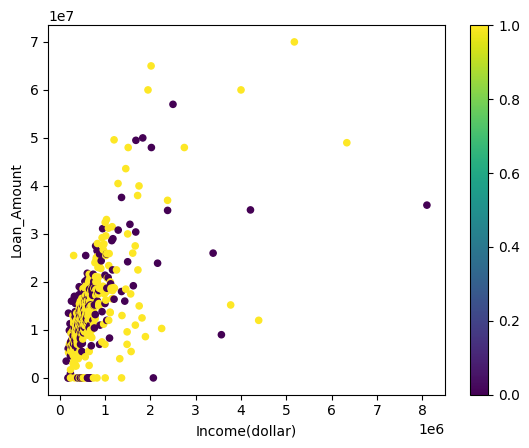

In [7]:
df.plot(kind='scatter', x='Income(dollar)', y='Loan_Amount', c=df['Status'], cmap=plt.cm.viridis) # show graph

##Now we need to separate features and label, and divide the data set to 80% for training, and 20% for testing:

In [8]:
y = df['Status'] # set y for train
X = df.drop(columns=['Status','Gender','Married','Dependents','Education','Self_Employed','Coapplicant','Term(month)','loan_History','Area']) # drop status and unimportant information
X_train, X_test, y_train, y_test = model_selection.train_test_split(X, y, train_size=0.80, random_state=101) # จำแนกข้อมูล

In [9]:
X_train # print ข้อมูลสำหรับ train

,Income(dollar),Loan_Amount
382,619400.0,13700000
597,2023300.0,48000000
388,625000.0,12800000
278,510000.0,9000000
31,282500.0,9400000
...,...,...
75,341800.0,13500000
599,2160000.0,23900000
575,1488000.0,9600000
337,570800.0,17000000


# Create two different SVM classifiers (soft margin); one with Linear kernel, and another one with Polynomial kernel:

In [ ]:
# train แบบ linear
linear = svm.SVC(kernel='linear', C=0.1)
linear.fit(X_train, y_train)

# train แบบ polynomial
poly = svm.SVC(kernel='poly', degree=2, C=0.5)
poly.fit(X_train, y_train)

#Evaluate the Accuracy of the two models

In [ ]:
print("Train set accuracy = " + str(linear.score(X_train, y_train)))
print("Test set accuracy = " + str(linear.score(X_test, y_test)))

Train set accuracy = 0.9416666666666667
Test set accuracy = 1.0


In [ ]:
print("Train set accuracy = " + str(poly.score(X_train, y_train)))
print("Test set accuracy = " + str(poly.score(X_test, y_test)))

Train set accuracy = 0.9583333333333334
Test set accuracy = 1.0


In [ ]:
poly_pred = poly.predict(X_test)
comparison_df = pd.DataFrame({'y_test': y_test, 'poly_pred': poly_pred, 'match': y_test == poly_pred})
print(comparison_df)

     y_test  poly_pred  match
33        0          0   True
16        0          0   True
43        0          0   True
129       2          2   True
50        1          1   True
123       2          2   True
68        1          1   True
53        1          1   True
146       2          2   True
1         0          0   True
147       2          2   True
32        0          0   True
31        0          0   True
122       2          2   True
127       2          2   True
74        1          1   True
88        1          1   True
96        1          1   True
42        0          0   True
134       2          2   True
80        1          1   True
48        0          0   True
90        1          1   True
65        1          1   True
97        1          1   True
64        1          1   True
93        1          1   True
114       2          2   True
25        0          0   True
41        0          0   True


#Plotting Decision Boundaries

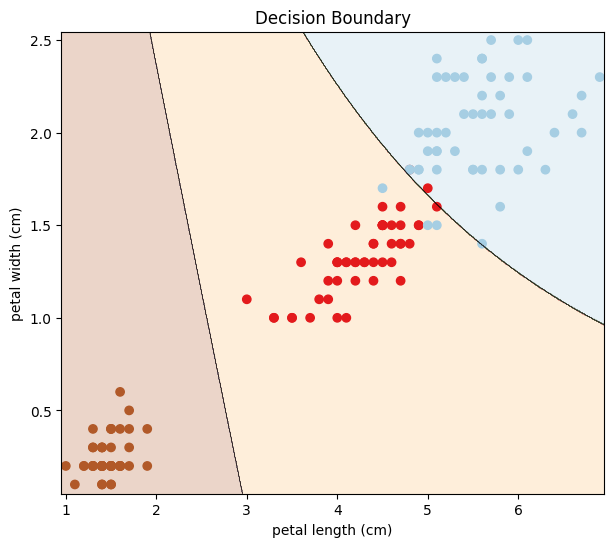

In [ ]:
def plot_decision_boundary(clf, X, y, cmap='Paired_r'):
    h = 0.005  # Boundary lines' resolution
    x_min, x_max = X['petal length (cm)'].min() - 10*h, X['petal length (cm)'].max() + 10*h
    y_min, y_max = X['petal width (cm)'].min() - 10*h, X['petal width (cm)'].max() + 10*h
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))
    # use column names for prediction to avoid dimension issues
    Z = clf.predict(pd.DataFrame(np.c_[xx.ravel(), yy.ravel()], columns=['petal length (cm)', 'petal width (cm)']))

    Z = Z.reshape(xx.shape)

    plt.figure(figsize=(7,6))
    plt.contourf(xx, yy, Z, cmap=cmap, alpha=0.25)  # Background
    plt.contour(xx, yy, Z, colors='k', linewidths=0.2)  # Boundary lines

    # Plot the training data points
    plt.scatter(X['petal length (cm)'], X['petal width (cm)'], c=y, cmap=cmap)
    plt.xlabel(iris_data.feature_names[2])
    plt.ylabel(iris_data.feature_names[3])
    plt.title('Decision Boundary')
    plt.show()


# Call with the training data and polynomial model
plot_decision_boundary(poly, X, y)

# Apply other evaluation Matrics

In [ ]:
conf_matrix_polySVM = confusion_matrix(y_test, poly_pred)
precision_polySVM = precision_score(y_test, poly_pred, average="macro")
recall_polySVM = recall_score(y_test, poly_pred, average="macro")
f1_polySVM = f1_score(y_test, poly_pred, average="macro")

print("Polynomial SVM efficiency \n")
print("Precision: ", precision_polySVM)
print("Recall: ", recall_polySVM)
print("F1-Score: ", f1_polySVM)

print("Confusion Matrix:\n", conf_matrix_polySVM)


Polynomial SVM efficiency 

Precision:  1.0
Recall:  1.0
F1-Score:  1.0
Confusion Matrix:
 [[10  0  0]
 [ 0 12  0]
 [ 0  0  8]]


In [ ]:
import joblib

filename = 'finalized_model.sav'
joblib.dump(linear, filename)

['finalized_model.sav']